# Filters in pycoco

---------------------

## Introduction

This notebook aims to serve as a short tutorial (along with the others in this directory). In this notebook, the tools for adding/testing/plotting filters in `pycoco`, as a companion to the `c` code `CoCo`


In [68]:
from __future__ import print_function ## Force python3-like printing

%matplotlib inline
from matplotlib import pyplot as plt

import os

import pycoco as pcc

reload(pcc) ## FOR DEV


<module 'pycoco' from '/Users/berto/Code/verbose-enigma/pycoco/__init__.py'>

## Using `FilterClass`

### `FilterClass` Methods and Variables

Filters in **`pycoco`** are handled using a **`FilterClass()`**, which has the methods:

**`FilterClass.__init__()`**

**`FilterClass.read_filter_file()`** 

**`FilterClass.calculate_effective_wavelength()`**

**`FilterClass.calculate_edges()`** 

**`FilterClass.plot()`**

**`FilterClass.resample_response()`**

**`FilterClass.calculate_plot_colour()`**


and variables:

**`FilterClass._wavelength_units`**

**`FilterClass._filter_file_path`**

**`FilterClass._upper_edge`**

**`FilterClass._lower_edge`**

**`FilterClass.lambda_effective`**

**`FilterClass.wavelength`**

**`FilterClass.throughput`**


### Loading a Filter

We can use **`pcc.load_filter()`** to intialise a FilterClass instance and load in a response function given a valid path to that filter.
**`pcc.load_filter()`** is essentially a wrapper for the class methods: **read_filter_file()**, **calculate_effective_wavelength()** and **calculate_plot_colour()**.

In [69]:
verbose = True

if "PYCOCO_FILTER_DIR" not in os.environ:
    filter_dir = "/Users/berto/Code/CoCo/data/filters/"
else:
    filter_dir = os.environ["PYCOCO_FILTER_DIR"]
    
filter_filename = "B.dat"


path_to_filter = os.path.join(os.path.abspath(filter_dir), filter_filename)

if verbose: print("Path to the filter: ", path_to_filter)

Path to the filter:  /Users/berto/Code/CoCo/data/filters/B.dat


In [70]:
B = pcc.load_filter(path = path_to_filter)

In [71]:
pcc.hex['B']

'#0000ff'

Now we can check that everything has been loaded in automatically.

In [72]:
B.__dict__

{'_filter_file_path': '/Users/berto/Code/CoCo/data/filters/B.dat',
 '_frequency_units': Unit("Hz"),
 '_lower_edge': 3600.0,
 '_plot_colour': '#0000ff',
 '_upper_edge': 5600.0,
 '_wavelength_units': Unit("Angstrom"),
 'filter_name': 'B',
 'lambda_effective': <Quantity 4354.410549343705 Angstrom>,
 'throughput': array([ 0.   ,  0.03 ,  0.134,  0.567,  0.92 ,  0.978,  1.   ,  0.978,
         0.935,  0.853,  0.74 ,  0.64 ,  0.536,  0.424,  0.325,  0.235,
         0.15 ,  0.095,  0.043,  0.009,  0.   ]),
 'wavelength': array([ 3600.,  3700.,  3800.,  3900.,  4000.,  4100.,  4200.,  4300.,
         4400.,  4500.,  4600.,  4700.,  4800.,  4900.,  5000.,  5100.,
         5200.,  5300.,  5400.,  5500.,  5600.]),
 'wavelength_u': <Quantity [ 3600., 3700., 3800., 3900., 4000., 4100., 4200., 4300., 4400.,
             4500., 4600., 4700., 4800., 4900., 5000., 5100., 5200., 5300.,
             5400., 5500., 5600.] Angstrom>}

Looks good! But we can always check by plotting.

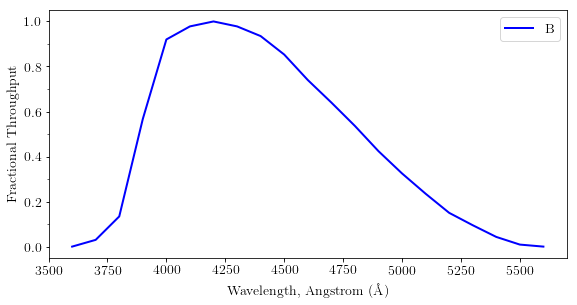

In [73]:
B.plot()

If the effective wavelength of the filter has been calculated, then a colour can be picked from a colourmap. This will come in handy for datasets with more than a few filters. This can be done using **`FilterClass.calculate_plot_colour(...)`**

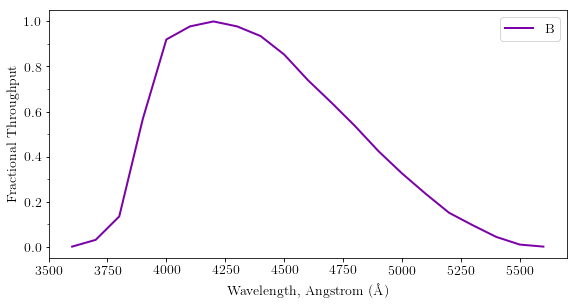

In [74]:
B.calculate_plot_colour()
B.plot()

You can also show the edges of the filter by passing `show_lims = True`. This uses the edges as defined by **`FilterClass.calculate_edges()`** and stored in **`FilterClass._upper_edge`** and
**`FilterClass._lower_edge`**

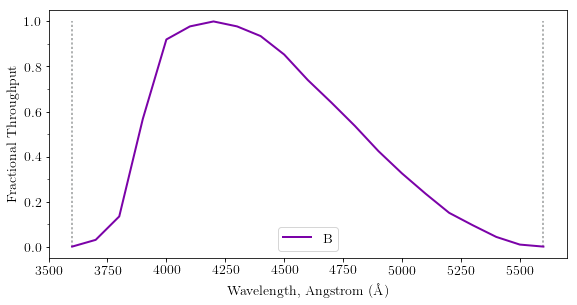

In [75]:
B.plot(show_lims = True)

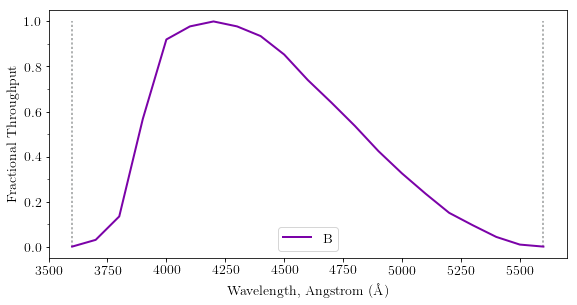

In [76]:
B.plot(show_lims = True)

As well as dealing with the filters in wavelength-space, frequency conversions can also be done. The calculation for effective F_nu especially is useful for making flux unit conversions  

In [96]:
B.calculate_frequency()
B.frequency_u

<Quantity [  8.32756828e+14,  8.10249886e+14,  7.88927521e+14,
             7.68698610e+14,  7.49481145e+14,  7.31201117e+14,
             7.13791567e+14,  6.97191763e+14,  6.81346495e+14,
             6.66205462e+14,  6.51722735e+14,  6.37856294e+14,
             6.24567621e+14,  6.11821343e+14,  5.99584916e+14,
             5.87828349e+14,  5.76523958e+14,  5.65646147e+14,
             5.55171219e+14,  5.45077196e+14,  5.35343675e+14] Hz>

In [97]:
B.calculate_effective_frequency()
B.nu_effective

<Quantity 699311552694397.1 Hz>